### https://github.com/facebookresearch/Kats

In [1]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams
import pandas as pd

In [2]:
# take `air_passengers` data as an example
air_passengers_df = pd.read_csv("air_passengers.csv", parse_dates= True, index_col="ds").reset_index()
air_passengers_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [20]:
air_passengers_df["y_pct_change"] = air_passengers_df["y"].pct_change()

<AxesSubplot:>

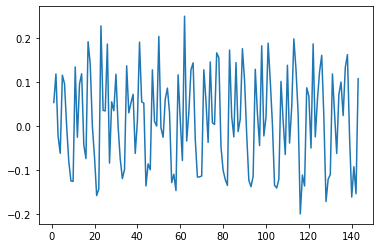

In [21]:
air_passengers_df["y_pct_change"].plot()

In [24]:
air_passengers_ts = TimeSeriesData(df=air_passengers_df[["y_pct_change","ds"]], time_col_name="ds")

In [25]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(air_passengers_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
fcst.head()

,time,fcst,fcst_lower,fcst_upper
0,1961-01-01,0.039751,-0.009578,0.087682
1,1961-02-01,-0.003314,-0.056386,0.048079
2,1961-03-01,0.172709,0.121545,0.222189
3,1961-04-01,-0.007218,-0.056352,0.042943
4,1961-05-01,0.022312,-0.023149,0.069750


<AxesSubplot:>

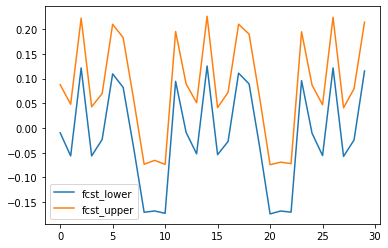

In [48]:
fcst[["fcst_lower", "fcst_upper"]].plot()

###############################################################################################

<AxesSubplot:xlabel='ds'>

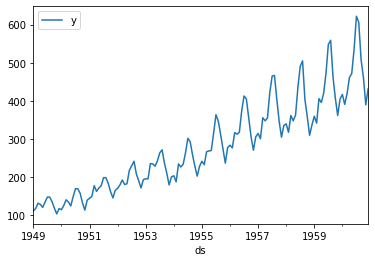

In [38]:
# or
air_passengers_df.plot(y="y",x="ds")

In [39]:
air_passengers_ts = TimeSeriesData(df=air_passengers_df[["y","ds"]], time_col_name="ds")

In [40]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative', yearly_seasonality=True) # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(air_passengers_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst2 = m.predict(steps=30, freq="MS")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
fcst2.head()

,time,fcst,fcst_lower,fcst_upper
0,1961-01-01,451.566331,438.189638,464.670341
1,1961-02-01,432.987175,419.617839,446.286974
2,1961-03-01,492.292191,478.787252,505.709392
3,1961-04-01,495.128956,481.408894,508.091609
4,1961-05-01,503.968553,491.080778,516.053537


<AxesSubplot:>

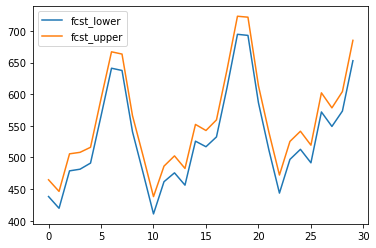

In [47]:
fcst2[["fcst_lower", "fcst_upper"]].plot()

##################################################################################################

In [52]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi

from dotenv import load_dotenv
load_dotenv()

True

In [53]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [54]:
type(alpaca_secret_key)

str

In [55]:
ticker = ["TSLA"]

timeframe = "1D"

start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head(10)

TSLA                                   
                             open      high     low   close   volume
time                                                                
2016-01-12 00:00:00-05:00  211.60  213.7395  205.31  209.97  2366065
2016-01-13 00:00:00-05:00  212.01  212.6500  200.00  200.39  2903890
2016-01-14 00:00:00-05:00  202.21  210.0000  193.38  206.18  5085115
2016-01-15 00:00:00-05:00  198.97  205.0700  197.25  204.98  4101900
2016-01-19 00:00:00-05:00  208.71  210.4700  200.78  204.71  3210176
2016-01-20 00:00:00-05:00  199.40  201.2800  191.25  198.70  4678206
2016-01-21 00:00:00-05:00  201.55  203.2300  195.02  199.97  2550809
2016-01-22 00:00:00-05:00  204.81  205.5000  199.03  202.55  2363881
2016-01-25 00:00:00-05:00  200.06  203.5700  195.88  196.37  2141988
2016-01-26 00:00:00-05:00  196.70  197.8200  188.88  193.56  3869441

In [82]:
df_ticker.columns = ['_'.join(col) for col in df_ticker.columns.values]
df_ticker.head()

,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume
time,,,,,
2016-01-12 00:00:00-05:00,211.60,213.7395,205.31,209.97,2366065
2016-01-13 00:00:00-05:00,212.01,212.6500,200.00,200.39,2903890
2016-01-14 00:00:00-05:00,202.21,210.0000,193.38,206.18,5085115
2016-01-15 00:00:00-05:00,198.97,205.0700,197.25,204.98,4101900
2016-01-19 00:00:00-05:00,208.71,210.4700,200.78,204.71,3210176


In [87]:
df_ticker=df_ticker.reset_index()

In [119]:
df_ticker["time"] = df_ticker['time'].dt.tz_localize(None)

In [120]:
tsla = df_ticker[["time","TSLA_close"]]
tsla.columns = ["ds", "y"]

In [121]:
tsla.dtypes

ds    datetime64[ns]
y            float64
dtype: object

<AxesSubplot:>

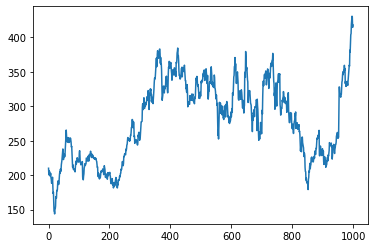

In [122]:
tsla["y"].plot()

In [123]:
tsla_ts = TimeSeriesData(df=tsla[["y","ds"]], time_col_name="ds")

In [124]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative', daily_seasonality=True) # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(tsla_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst3 = m.predict(steps=30, freq="MS")

In [125]:
fcst3.head()

,time,fcst,fcst_lower,fcst_upper
0,2020-01-01,399.729834,381.964228,417.243143
1,2020-02-01,372.798565,348.449860,397.493524
2,2020-03-01,364.398259,301.512906,418.695894
3,2020-04-01,369.650631,234.488078,474.750679
4,2020-05-01,333.938337,143.787221,485.319444


<AxesSubplot:>

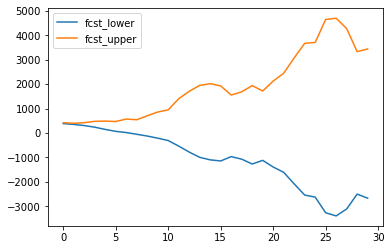

In [126]:
fcst3[["fcst_lower", "fcst_upper"]].plot()

In [134]:
# as seen above, upper and lower bounds are diverging
# let's try fixing nonstationarity and apply our model

df_ticker["TSLA_close_pct_change"] = df_ticker["TSLA_close"].pct_change()

In [135]:
tsla = df_ticker[["time","TSLA_close_pct_change"]]
tsla.columns = ["ds", "y"]

In [136]:
tsla.dtypes

ds    datetime64[ns]
y            float64
dtype: object

<AxesSubplot:>

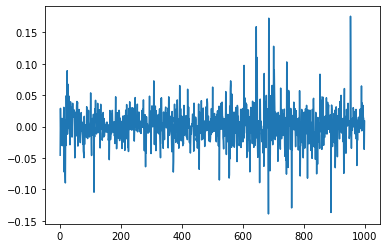

In [138]:
tsla["y"].plot()

In [139]:
tsla_ts2 = TimeSeriesData(df=tsla[["y","ds"]], time_col_name="ds")

In [140]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative', daily_seasonality=True) # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(tsla_ts2, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst4 = m.predict(steps=30, freq="MS")

In [141]:
fcst4.head()

,time,fcst,fcst_lower,fcst_upper
0,2020-01-01,0.007704,-0.030399,0.046435
1,2020-02-01,0.007174,-0.031834,0.044827
2,2020-03-01,-0.011713,-0.047515,0.024542
3,2020-04-01,0.002175,-0.035417,0.041173
4,2020-05-01,-0.012613,-0.050851,0.021891


<AxesSubplot:>

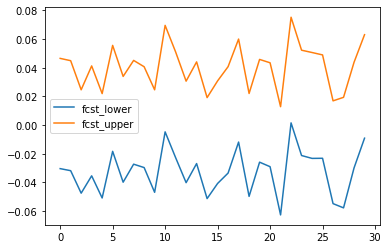

In [142]:
fcst4[["fcst_lower", "fcst_upper"]].plot()